In [1]:
import numpy as np
import uproot
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py

In [2]:
from src.process_data import process_data
from src.graph import graph
from src.transmission import transmission

In [3]:
process_data([i for i in range(117369, 117391)], "PTBC", "temp_data/BiIn.hdf5")

/Users/livingroom-pc/Documents/artie/MArEX_Analysis/src/process_data.py:7: RuntimeWarning: invalid value encountered in sqrt
  return m * (1 / np.sqrt(1 - x * x / c / c / tof / tof) - 1)


In [4]:
process_data([i for i in range(117362, 117369)], "PTBC", "temp_data/BiOut.hdf5")

In [5]:
BiIn = h5py.File("temp_data/BiIn.hdf5", "r")
BiOut = h5py.File("temp_data/BiOut.hdf5", "r")

In [6]:
amp_BiIn = BiIn['amp'][:]
en_BiIn = BiIn['energy'][:]
norm_BiIn = BiIn['norm'][0]
amp_BiOut = BiOut['amp'][:]
en_BiOut = BiOut['energy'][:]
norm_BiOut = BiOut['norm'][0]

In [7]:
en_BiIn_select = en_BiIn[(en_BiIn > 600) & (en_BiIn < 1000) & (amp_BiIn > 4000)]
en_BiOut_select = en_BiOut[(en_BiOut > 600) & (en_BiOut < 1000) & (amp_BiOut > 4000)]

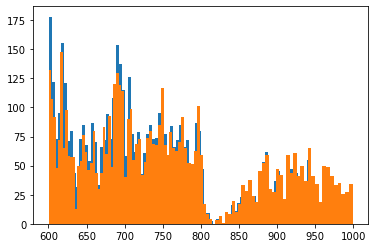

In [10]:
hist_BiIn, bins_BiIn, _, _ = graph(en_BiIn_select, 100)

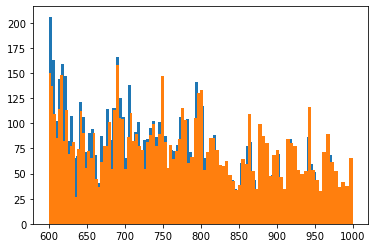

In [11]:
hist_BiOut, bins_BiOut, _, _ = graph(en_BiOut_select, 100)

In [13]:
tr, tr_error = transmission(hist_BiIn, np.sqrt(hist_BiIn), hist_BiOut, np.sqrt(hist_BiOut))

In [15]:
bins = (bins_BiIn[1:] + bins_BiIn[:-1]) / 2

<ErrorbarContainer object of 3 artists>

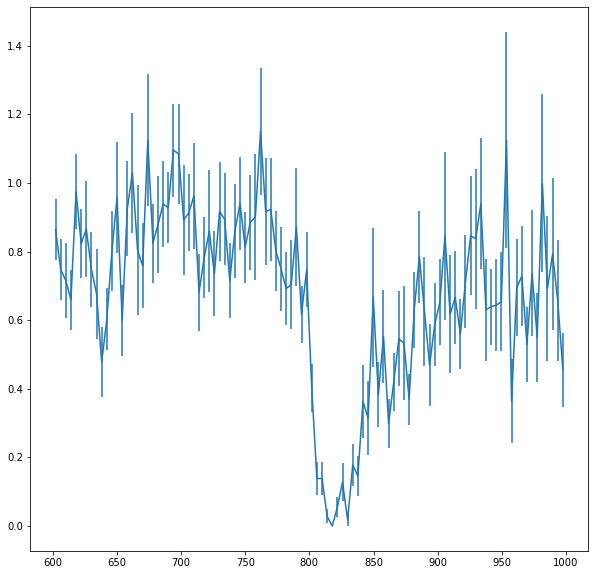

In [16]:
plt.figure(figsize=(10,10))
plt.errorbar(bins, tr, yerr=tr_error)